This notebook contains the project for Complex system simulation, Complex financial networks

In [1]:
# imports
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import sys
import os
import time
import datetime
import pickle
import argparse
import itertools
from typing import Dict, List, Any, Tuple
import doctest
import pandas as pd
import powerlaw
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import glob
import custom_functions_adj_saving_func as cm
import ast

In [2]:
def get_statistics_vary_threshold_v(pattern: str = './200_2000_*.csv'):
    def safe_literal_eval(s):
        try:
            return ast.literal_eval(s)
        except (ValueError, SyntaxError):
            return np.nan

    def calculate_average_list(column):
        return column.apply(safe_literal_eval).apply(lambda x: np.mean(x) if isinstance(x, list) and len(x) > 0 else np.nan)

    abs_diff_avg_per_run_per_threshold = {}

    for filepath in glob.glob(pattern):
        df = pd.read_csv(filepath)
        filename = os.path.basename(filepath).replace('.csv', '')
        parts = filename.split('_')
        threshold_v = float(parts[5])
        abs_diff_avg = calculate_average_list(df['Abs Difference of Bankrupt Agents Over Time'])
        if threshold_v not in abs_diff_avg_per_run_per_threshold:
            abs_diff_avg_per_run_per_threshold[threshold_v] = []
        abs_diff_avg_per_run_per_threshold[threshold_v].append(abs_diff_avg)

    return abs_diff_avg_per_run_per_threshold

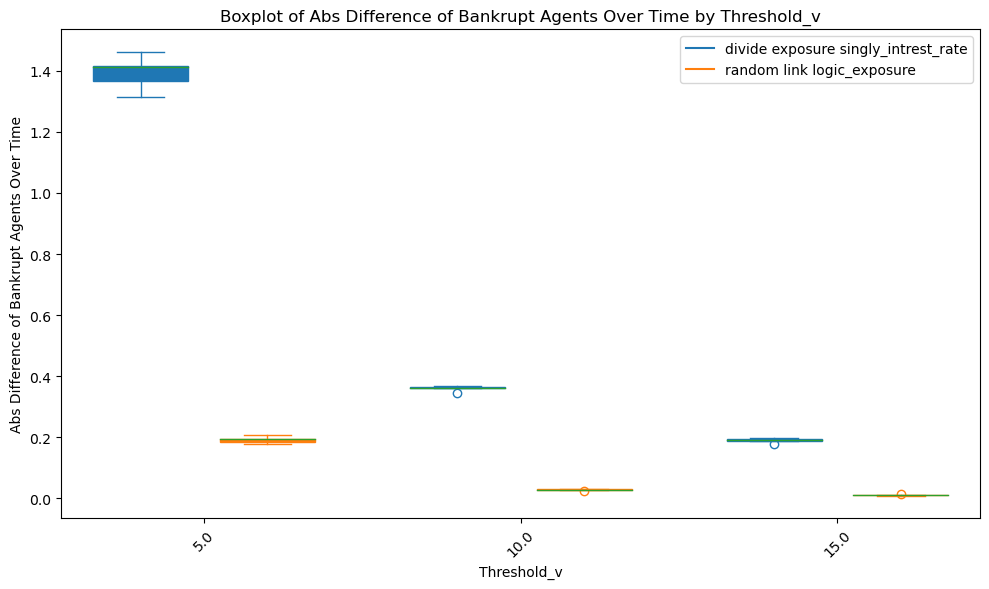

In [3]:
# First dataset，our mode
pattern1 = './100_10000_1_1_1_*_1_3_400_hard cutoff_divide exposure singly_intrest_rate_*.csv'
all_results1 = get_statistics_vary_threshold_v(pattern=pattern1)
data1 = all_results1
thresholds1 = list(data1.keys())
data_to_plot1 = []
for values in data1.values():
    flattened_values = [x for sublist in values for x in sublist if not np.isnan(x)]
    data_to_plot1.append(np.array(flattened_values))
sorted_data1 = sorted(zip(thresholds1, data_to_plot1), key=lambda x: x[0])
thresholds1, data_to_plot1 = zip(*sorted_data1)

# Second dataset, paper mode
pattern2 = './100_10000_1_1_1_*_1_3_400_hard cutoff_random link logic_exposure_*.csv'
all_results2 = get_statistics_vary_threshold_v(pattern=pattern2)
data2 = all_results2
thresholds2 = list(data2.keys())
data_to_plot2 = []
for values in data2.values():
    flattened_values = [x for sublist in values for x in sublist if not np.isnan(x)]
    data_to_plot2.append(np.array(flattened_values))
# Sorting the data by threshold values in ascending order
sorted_data2 = sorted(zip(thresholds2, data_to_plot2), key=lambda x: x[0])
thresholds2, data_to_plot2 = zip(*sorted_data2)

# Creating the boxplot
plt.figure(figsize=(10, 6))

# Plotting the boxplot for the first dataset
bp1 = plt.boxplot(data_to_plot1, positions=np.array(range(len(data_to_plot1)))*2.0-0.4, widths=0.6, patch_artist=True, boxprops=dict(facecolor='C0', color='C0'), whiskerprops=dict(color='C0'), capprops=dict(color='C0'), medianprops=dict(color='C2'), flierprops=dict(markeredgecolor='C0'))

# Plotting the boxplot for the second dataset
bp2 = plt.boxplot(data_to_plot2, positions=np.array(range(len(data_to_plot2)))*2.0+0.4, widths=0.6, patch_artist=True, boxprops=dict(facecolor='C1', color='C1'), whiskerprops=dict(color='C1'), capprops=dict(color='C1'), medianprops=dict(color='C2'), flierprops=dict(markeredgecolor='C1'))

# Adding dummy lines for the legend
plt.plot([], c='C0', label='divide exposure singly_intrest_rate')
plt.plot([], c='C1', label='random link logic_exposure')

# Setting the axis labels and title
plt.xlabel('Threshold_v')
plt.ylabel('Abs Difference of Bankrupt Agents Over Time')
plt.title('Boxplot of Abs Difference of Bankrupt Agents Over Time by Threshold_v')

# Setting the tick labels on the x-axis
plt.xticks(np.arange(0, len(thresholds1) * 2, 2), thresholds1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()


plt.show()